# Multi-Class Image Classification

1. Veriyi incele
2. Veriyi modele hazirla (preprocess)
3. Modeli olustur (basit bir model ile basla)
4. Modeli uygula (model.fit / overfitting yapmasini saglamak modelin fazla da olsa ogrenigini kanitlar)
5. Modeli degerlendir (evaluate)
6. Farkli hiperparametreler ile modeli gelistir(ayni zamanda overfitting yapiyorsa bunu engelle)
7. Tatmin edici performans elde edene kadar bu asamalari tekrar et

## 1. Veriyi Incele

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip 
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-03-24 13:29:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.128.128, 142.251.6.128, 142.250.159.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.128.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   123MB/s    in 4.5s    

2022-03-24 13:29:49 (110 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Verimizin nerede olduguna bakalim

In [2]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 

Verimizi degiskenlere tanimlayalim

In [3]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

Hangi siniflarla calisacagimiza bakalim

In [4]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
for i in class_names :
  print(i)

chicken_curry
chicken_wings
fried_rice
grilled_salmon
hamburger
ice_cream
pizza
ramen
steak
sushi


Rastgele bir verimize bakalim

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}") 

  return img

['3125420.jpg']
Image shape: (384, 512, 3)


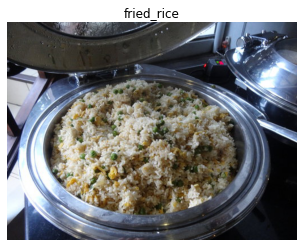

In [6]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

## 2.Veriyi modele hazirla (preprocess)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale, 0-1 arasinda olmasini istiyoruz
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3.Modeli olustur (basit bir model ile basla)

CNN ne bilmiyorsak sikinti suraya bakalim ----> https://poloclub.github.io/cnn-explainer/

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# model
model = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") #10 classimiz var
])

# Compile
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

## 4. Modeli fit eyle (Fit the model denir ama boyle de hos oldu)

In [9]:
history = model.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 68s 249ms/step - loss: 2.1232 - accuracy: 0.2265 - val_loss: 1.9460 - val_accuracy: 0.2880
Epoch 2/5
235/235 [==============================] - 60s 254ms/step - loss: 1.8406 - accuracy: 0.3681 - val_loss: 1.8212 - val_accuracy: 0.3488
Epoch 3/5
235/235 [==============================] - 57s 241ms/step - loss: 1.5385 - accuracy: 0.4884 - val_loss: 1.8801 - val_accuracy: 0.3464
Epoch 4/5
235/235 [==============================] - 56s 238ms/step - loss: 1.0266 - accuracy: 0.6661 - val_loss: 2.2083 - val_accuracy: 0.3332
Epoch 5/5
235/235 [==============================] - 59s 252ms/step - loss: 0.4983 - accuracy: 0.8449 - val_loss: 2.8353 - val_accuracy: 0.2992


## 5. Evaulate the model (Modeli degerlendirme diyelim ayib olmasin)

In [10]:
model.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 2.8353 - accuracy: 0.2992


[2.8352832794189453, 0.29919999837875366]

Grafik icin fonksiyonu kullanalim

In [11]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

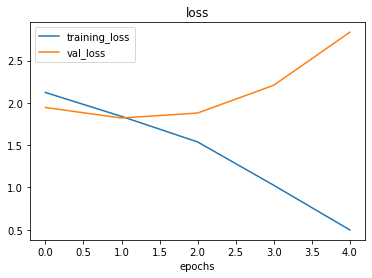

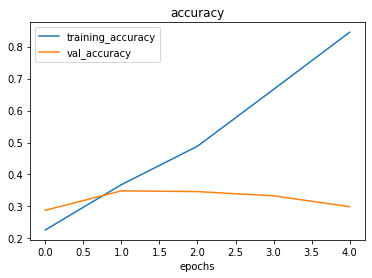

In [12]:
plot_loss_curves(history)

Evvvvettt grafikten overfitting yani asiri ogrenme yaptigini anliyabiliyoruz. O yuzden gelistirmeye baslayalim.

## 6.Modeli gelistirmek gerek

* Daha fazla veri
* Transfer Learning
* Modeli degistirmek 
* Data augmentation yani veri arttirma

Farkli model ile deneyelim Conv katmanlarinin bazilarini kaldiralim


In [13]:
model_2 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [14]:
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 52s 218ms/step - loss: 2.1365 - accuracy: 0.2403 - val_loss: 1.9497 - val_accuracy: 0.3048
Epoch 2/5
235/235 [==============================] - 53s 227ms/step - loss: 1.7765 - accuracy: 0.3964 - val_loss: 1.8987 - val_accuracy: 0.3296
Epoch 3/5
235/235 [==============================] - 58s 246ms/step - loss: 1.4167 - accuracy: 0.5407 - val_loss: 1.9463 - val_accuracy: 0.3224
Epoch 4/5
235/235 [==============================] - 55s 232ms/step - loss: 0.9479 - accuracy: 0.7073 - val_loss: 2.1383 - val_accuracy: 0.3140
Epoch 5/5
235/235 [==============================] - 54s 231ms/step - loss: 0.5137 - accuracy: 0.8585 - val_loss: 2.6631 - val_accuracy: 0.2996


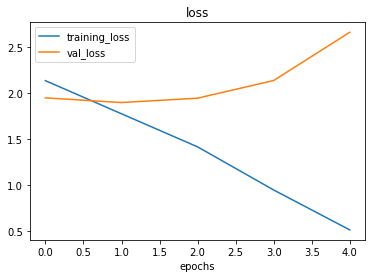

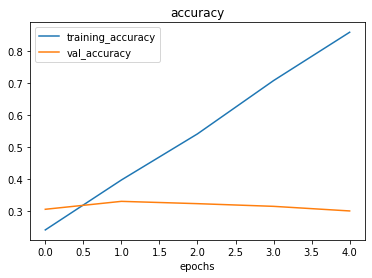

In [15]:
plot_loss_curves(history_2)

**Modeli degistirmek ise yaramadi hala overfitting sorunu var, data augmentation deneyelim**

In [16]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [17]:
model_3 = tf.keras.models.clone_model(model_2) #ayni modeli kopyalamamiza yarar

# Compile 
model_3.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [18]:
history_3 = model_3.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 125s 532ms/step - loss: 2.1719 - accuracy: 0.2180 - val_loss: 1.9896 - val_accuracy: 0.2792
Epoch 2/5
235/235 [==============================] - 134s 573ms/step - loss: 2.0492 - accuracy: 0.2749 - val_loss: 1.9335 - val_accuracy: 0.3360
Epoch 3/5
235/235 [==============================] - 138s 587ms/step - loss: 2.0124 - accuracy: 0.2867 - val_loss: 1.9740 - val_accuracy: 0.3080
Epoch 4/5
235/235 [==============================] - 123s 522ms/step - loss: 1.9873 - accuracy: 0.3031 - val_loss: 1.9077 - val_accuracy: 0.3356
Epoch 5/5
235/235 [==============================] - 126s 537ms/step - loss: 1.9673 - accuracy: 0.3177 - val_loss: 1.8787 - val_accuracy: 0.3372


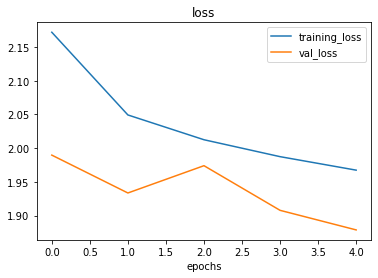

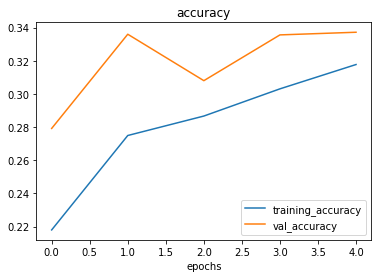

In [19]:
plot_loss_curves(history_3)

Evvvet overfitting problemini cozmus gibiyi simdi yapmamiz gereken tatmin edici sonuc alana kadar tekrar etmek. Daha uzun surede egitebiliriz yani epoch sayisini arttirabiliriz bunun gibi seylerle daha iyi bir model elde edilecektir. Ama modelimiz bu haliyle kotu performans gosteriyor.

Ekstra yeni bisiler deneyelim daha iyi bir sonuc icin

In [33]:
model_4 = Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") #10 classimiz var
])

model_4.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(0.001),
                 metrics=["accuracy"])

history_4 = model_4.fit(train_data_augmented,
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 129s 547ms/step - loss: 2.2396 - accuracy: 0.1523 - val_loss: 2.0802 - val_accuracy: 0.2380
Epoch 2/10
235/235 [==============================] - 130s 553ms/step - loss: 2.1248 - accuracy: 0.2169 - val_loss: 2.0076 - val_accuracy: 0.2828
Epoch 3/10
235/235 [==============================] - 126s 534ms/step - loss: 2.0486 - accuracy: 0.2707 - val_loss: 1.9164 - val_accuracy: 0.3324
Epoch 4/10
235/235 [==============================] - 126s 536ms/step - loss: 2.0057 - accuracy: 0.2896 - val_loss: 1.8780 - val_accuracy: 0.3352
Epoch 5/10
235/235 [==============================] - 126s 537ms/step - loss: 1.9613 - accuracy: 0.3171 - val_loss: 1.9129 - val_accuracy: 0.3224
Epoch 6/10
235/235 [==============================] - 127s 539ms/step - loss: 1.9412 - accuracy: 0.3203 - val_loss: 1.7792 - val_accuracy: 0.3772
Epoch 7/10
235/235 [==============================] - 130s 552ms/step - loss: 1.9169 - accuracy: 0.3292 - val_loss: 1.7325 -

daha uzun surede egitirsek daha iyi performans alabiliriz

# Modeli custom veri ile test etmek

Verileri indirmek/eklemek

In [21]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-03-24 13:59:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2022-03-24 13:59:39 (43.5 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2022-03-24 13:59:39--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [26]:
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [20]:
def pred_and_plot(model, filename, class_names=class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Tahmin yaptiralim

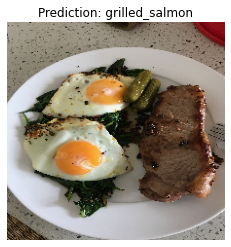

In [31]:
pred_and_plot(model=model_3,
              filename="03-steak.jpeg",
              class_names=class_names)

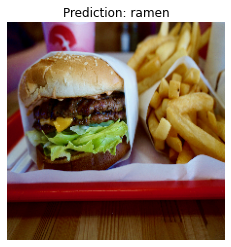

In [30]:
pred_and_plot(model=model_3,
              filename="03-hamburger.jpeg",
              class_names=class_names)

# Son olarak modeli kaydetme ve kaydedilmis modeli yukleme

Kaydetmek

In [ ]:
model_3.save("model_3_save")

Yuklemek

In [ ]:
loaded_model_3 = tf.keras.models.load_model("model_3_save")
loaded_model_3.evaluate(test_data)

Test edelim ayni sonuclari veriyor mu diye

In [ ]:
model_3.evaluate(test_data)